In [35]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from data_utils import persian_text, load_processed

In [36]:
mpl.rcParams['font.family'] = 'Vazir'
sns.set(style="whitegrid", font="Vazir")

df = load_processed()

df.tail(10)

,course_title,course_code,section,unit,professor1,professor2,professor3,capacity,enrolled,location,weekly_schedule,exam_date,notes,warning,year,semester_code,dept_code,department
110319,دستیار آموزشی,25TA0,1,3,خشایار مهرانی,NaN,NaN,0,1,NaN,NaN,,NaN,NaN,1403,3,25,مهندسی برق
110320,امتحان جامع دکترا,26000,1,0,رامین بزرگ مهری بوذرجمهری,NaN,NaN,0,0,NaN,NaN,,NaN,NaN,1403,3,26,مهندسی شیمی و نفت
110321,پیشنهاد پژوهشی,26002,1,0,رامین بزرگ مهری بوذرجمهری,NaN,NaN,0,0,NaN,NaN,,NaN,NaN,1403,3,26,مهندسی شیمی و نفت
110322,سمینار دکتری 2,26006,1,2,رامین بزرگ مهری بوذرجمهری,NaN,NaN,0,1,NaN,NaN,,NaN,NaN,1403,3,26,مهندسی شیمی و نفت
110323,رساله دکتری,26800,1,24,رامین بزرگ مهری بوذرجمهری,NaN,NaN,0,0,NaN,NaN,,NaN,NaN,1403,3,26,مهندسی شیمی و نفت
110324,امتحان جامع دکترا,28000,1,0,NaN,NaN,NaN,0,8,NaN,NaN,,NaN,NaN,1403,3,28,مهندسی مکانیک
110325,امتحان جامع دکتری,44000,1,0,NaN,NaN,NaN,0,5,NaN,NaN,,برای دانشجویان دکتری مدیریت,NaN,1403,3,44,مدیریت و اقتصاد
110326,امتحان جامع دکتری,44000,2,0,NaN,NaN,NaN,0,0,NaN,NaN,,برای دانشجویان دکتری علوم اقتصادی,NaN,1403,3,44,مدیریت و اقتصاد
110327,امتحان جامع دکتری,44000,3,0,NaN,NaN,NaN,0,2,NaN,NaN,,برای دانشجویان دکتری سیاست‌گذاری,NaN,1403,3,44,مدیریت و اقتصاد
110328,رساله دکتری,48100,1,22,راحله محمد پور,NaN,NaN,15,0,NaN,NaN,,NaN,NaN,1403,3,48,پژوهشکده علوم و فن‌آوری نانو


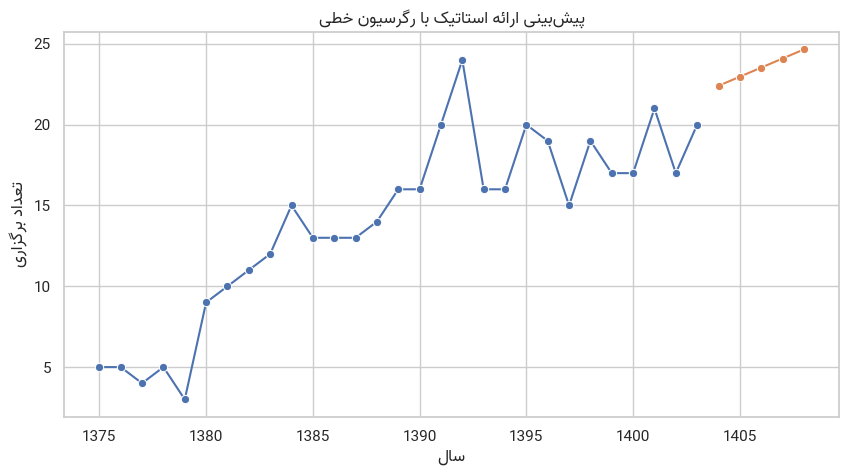

In [41]:
from sklearn.linear_model import LinearRegression

course_name = "استاتیک"
course_data = course_trends[course_trends["course_title"] == course_name]

X = course_data["year"].values.reshape(-1, 1) 
y = course_data["offer_count"].values

model = LinearRegression()
model.fit(X, y)

future_years = np.arange(course_data["year"].max() + 1, course_data["year"].max() + 6).reshape(-1, 1)
y_pred = model.predict(future_years)

plt.figure(figsize=(10,5))
sns.lineplot(x=course_data["year"], y=y, marker="o")
sns.lineplot(x=future_years.flatten(), y=y_pred, marker="o")
plt.title(persian_text(f"پیش‌بینی ارائه {course_name} با رگرسیون خطی"))
plt.xlabel(persian_text("سال"))
plt.ylabel(persian_text("تعداد برگزاری"))
plt.show()

05:54:50 - cmdstanpy - INFO - Chain [1] start processing
05:54:50 - cmdstanpy - INFO - Chain [1] done processing


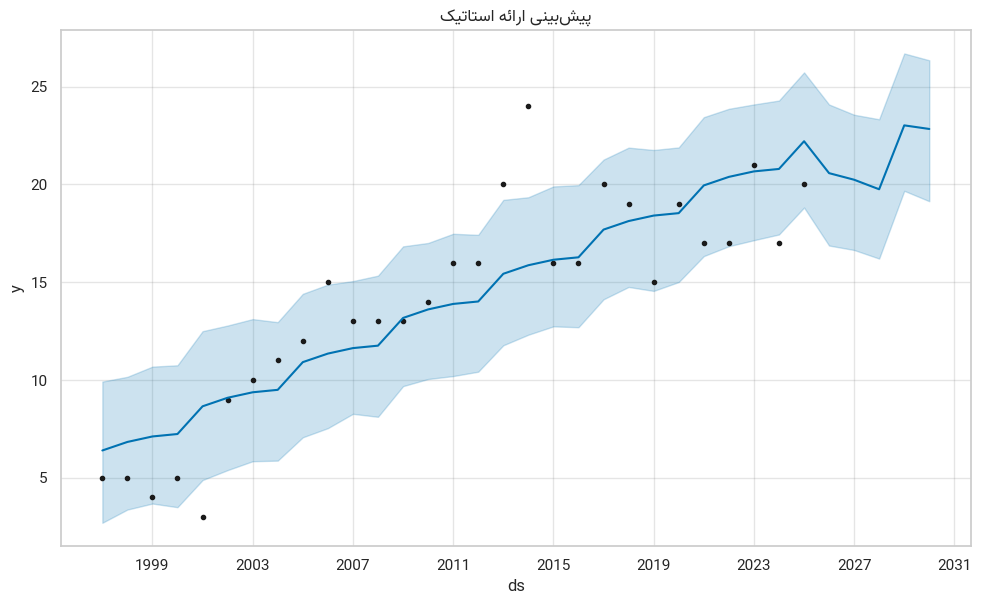

In [57]:
course_name = "استاتیک"
course_data = course_trends[course_trends["course_title"] == course_name]

df_prophet = course_data.rename(columns={"year": "ds", "offer_count": "y"})
# convert Persian year to Gregorian year
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"] + 622, format='%Y') 

m = Prophet(yearly_seasonality=True)
m.fit(df_prophet)

future = m.make_future_dataframe(periods=5, freq='YE')
forecast = m.predict(future)

fig = m.plot(forecast)
plt.title(persian_text(f"پیش‌بینی ارائه {course_name}"))
plt.show()


05:55:13 - cmdstanpy - INFO - Chain [1] start processing
05:55:13 - cmdstanpy - INFO - Chain [1] done processing


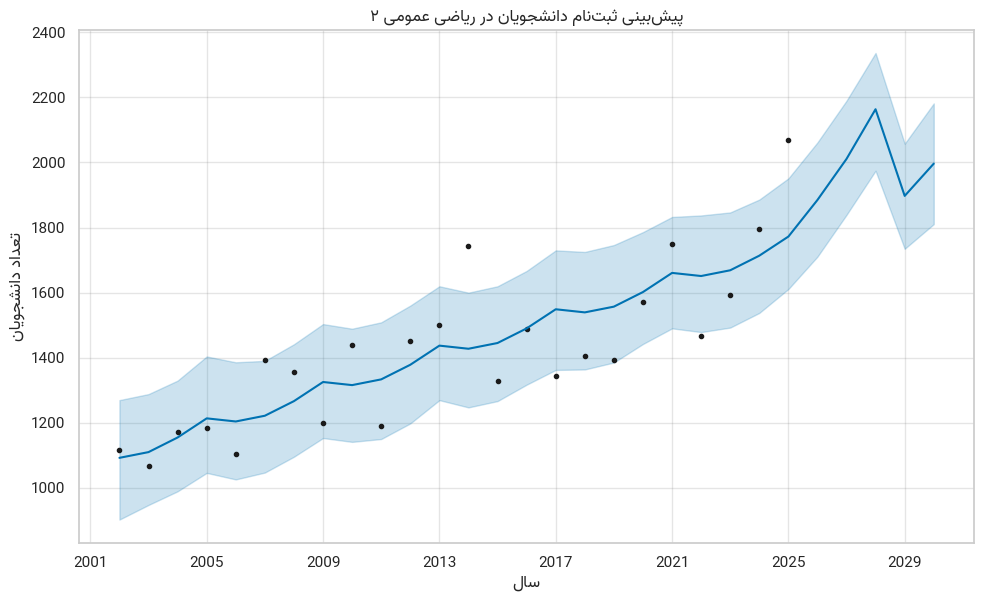

In [58]:
course_name = "ریاضی عمومی ۲"

course_participation = (
    df[(df["course_title"] == course_name) & (df["year"] >= 1380)]
    .groupby("year")["enrolled"]
    .sum()
    .reset_index()
    .dropna()
)

df_prophet = course_participation.rename(columns={"year": "ds", "enrolled": "y"})
# convert Persian year → Gregorian
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"] + 622, format='%Y')  

m = Prophet(yearly_seasonality=True)
m.fit(df_prophet)

future = m.make_future_dataframe(periods=5, freq="YE")
forecast = m.predict(future)

fig = m.plot(forecast)
plt.title(persian_text(f"پیش‌بینی ثبت‌نام دانشجویان در {course_name}"))
plt.xlabel(persian_text("سال"))
plt.ylabel(persian_text("تعداد دانشجویان"))
plt.show()

06:03:17 - cmdstanpy - INFO - Chain [1] start processing
06:03:17 - cmdstanpy - INFO - Chain [1] done processing
06:03:18 - cmdstanpy - INFO - Chain [1] start processing
06:03:18 - cmdstanpy - INFO - Chain [1] done processing
06:03:18 - cmdstanpy - INFO - Chain [1] start processing
06:03:18 - cmdstanpy - INFO - Chain [1] done processing


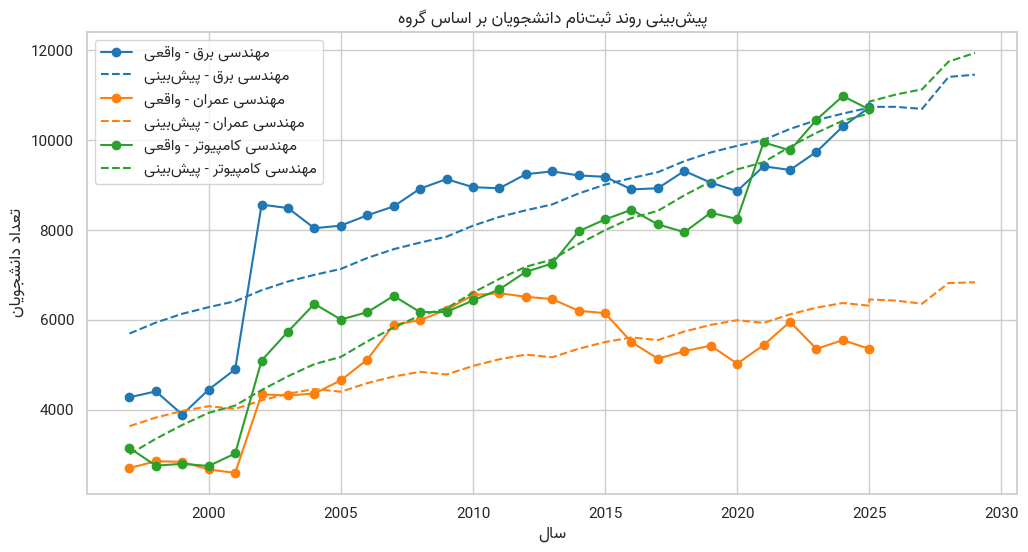

In [67]:
forecasts = {}

for dept in annual_summary["department"].unique():
    dept_df = annual_summary[annual_summary["department"] == dept][["year", "enrolled"]].copy()
    dept_df.rename(columns={"year": "ds", "enrolled": "y"}, inplace=True)
    
    # Convert Persian year to Gregorian
    dept_df["ds"] = pd.to_datetime(dept_df["ds"] + 622, format="%Y")
    
    model = Prophet()
    model.fit(dept_df)
    
    future = model.make_future_dataframe(periods=5, freq="YE")
    forecast = model.predict(future)
    forecasts[dept] = forecast


colors = plt.cm.tab10.colors 
color_cycle = iter(colors)

plt.figure(figsize=(12,6))
for i, (dept, forecast) in enumerate(forecasts.items()):
    hist = annual_summary[annual_summary["department"] == dept].copy()
    hist_year_gregorian = hist["year"] + 622
    
    color = next(color_cycle)
    plt.plot(hist_year_gregorian, hist["enrolled"], marker="o", color=color, label=persian_text(f"{dept} - واقعی"))
    plt.plot(forecast["ds"].dt.year, forecast["yhat"], linestyle="--", color=color, label=persian_text(f"{dept} - پیش‌بینی"))

plt.title(persian_text("پیش‌بینی روند ثبت‌نام دانشجویان بر اساس گروه"))
plt.xlabel(persian_text("سال"))
plt.ylabel(persian_text("تعداد دانشجویان"))
plt.legend()
plt.show()